<a href="https://colab.research.google.com/github/whdigrace/kfq_ML_2023/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [ ]:
iris_data = load_iris()


In [ ]:
x_train, x_test, y_train,y_test = train_test_split(iris_data.data,
                                                         iris_data.target)

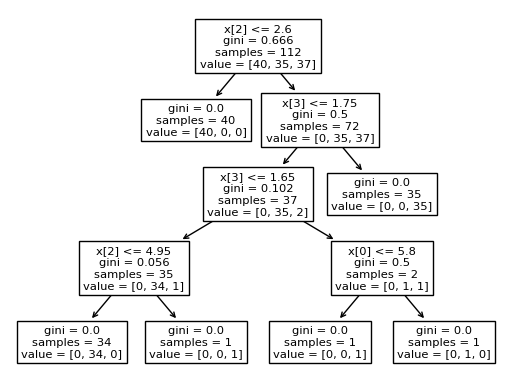

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
tree.plot_tree(dtc)
plt.show()

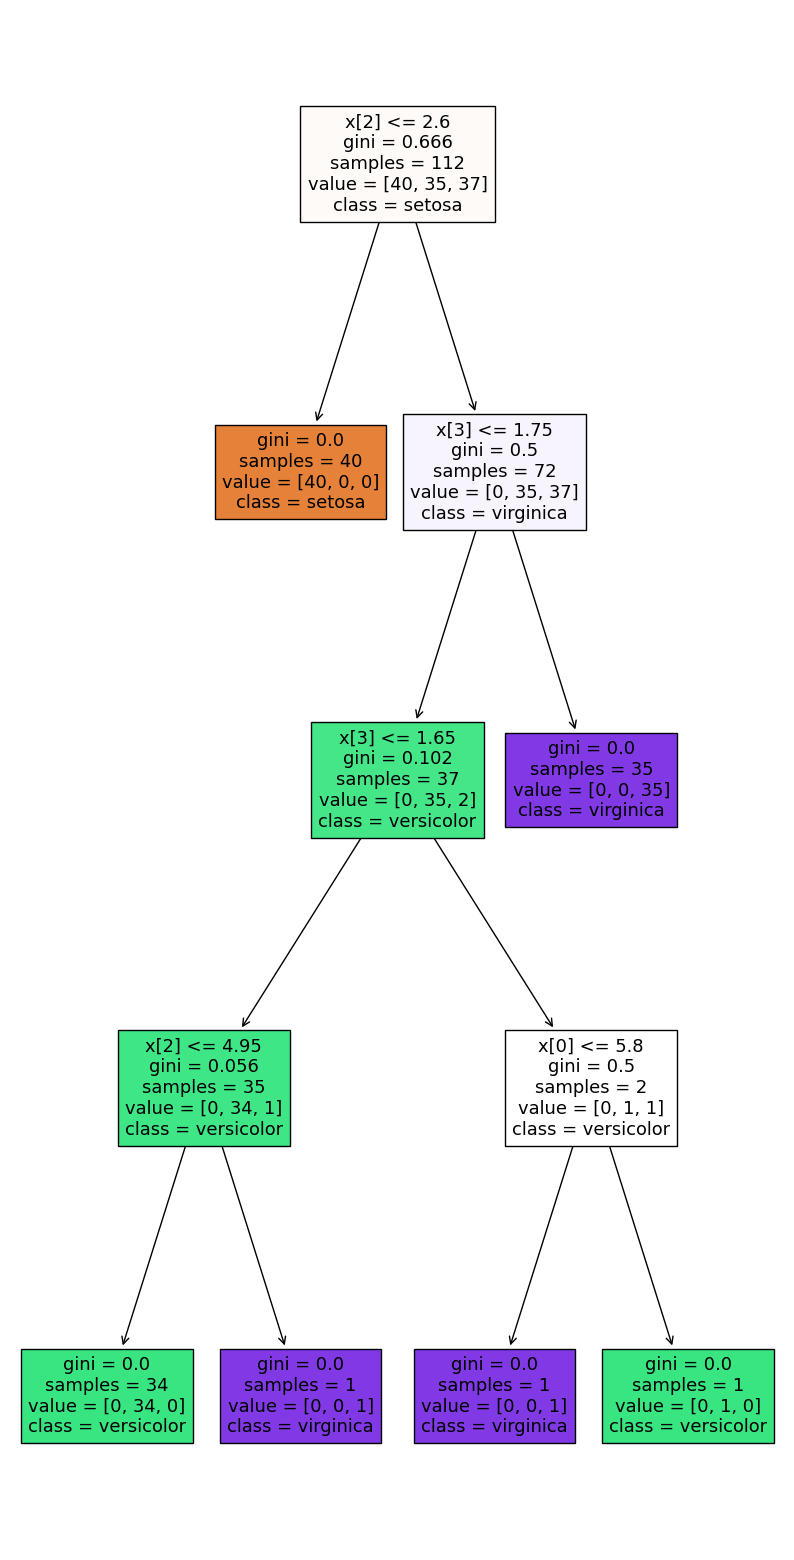

In [ ]:
plt.figure(figsize=(10,20))
tree.plot_tree(dtc,filled=True,
               class_names=iris_data.target_names)
plt.show()

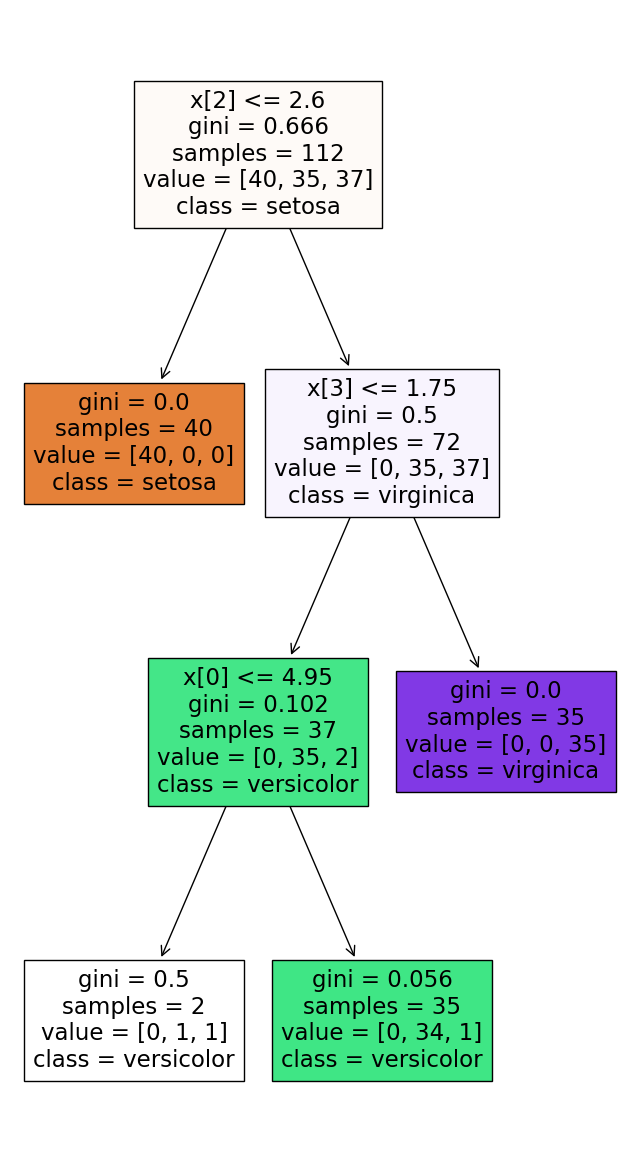

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)
plt.figure(figsize=(8,15))
tree.plot_tree(dtc,filled=True,
               class_names=iris_data.target_names)
plt.show()

In [ ]:
def gini2(datas):
  total = 0
  for data in datas:
    total +=data
  s=0
  for data in datas:
    s += (data/total)**2

  return 1 - s

In [ ]:
gini2([40,35,37])

0.665656887755102

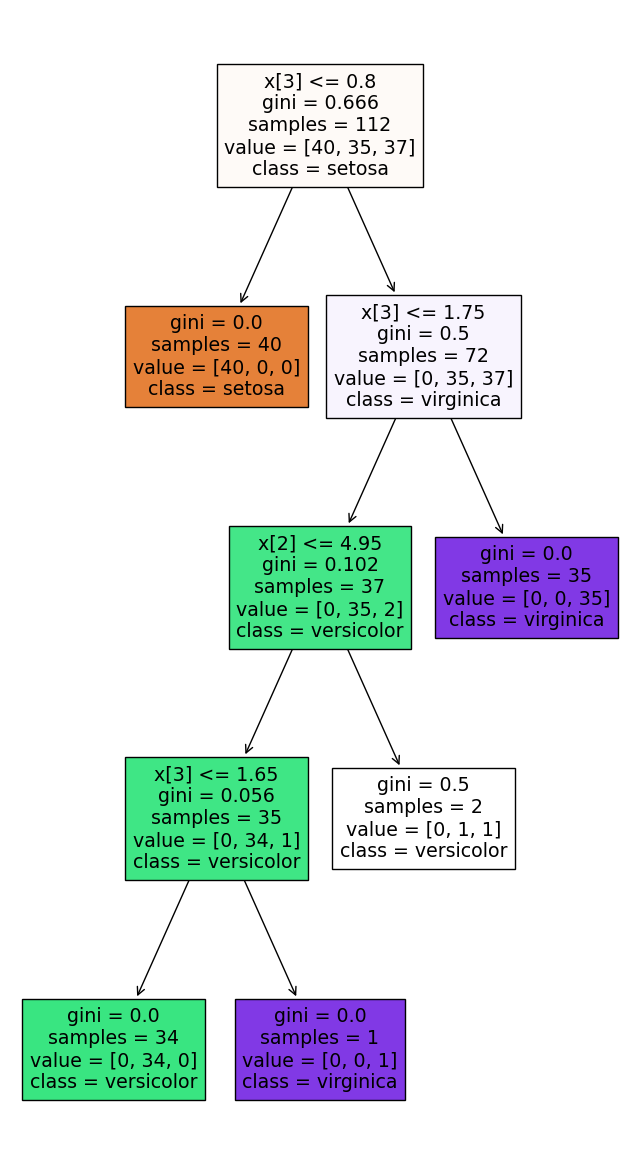

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=5)
dtc.fit(x_train,y_train)
plt.figure(figsize=(8,15))
tree.plot_tree(dtc,filled=True,
               class_names=iris_data.target_names)
plt.show()

In [ ]:
dtc.feature_importances_

array([0.        , 0.        , 0.01143285, 0.98856715])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
ss = pd.Series(iris_data.data[0])
ss.describe()

count    4.000000
mean     2.550000
std      2.179449
min      0.200000
25%      1.100000
50%      2.450000
75%      3.900000
max      5.100000
dtype: float64

In [ ]:
ss = pd.Series(iris_data.data[:,0])
rg = np.arange(ss.min(),ss.max(),0.3)
rg

array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9])

In [ ]:
for r in rg:
  print(ss<r)
  break

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [ ]:
gvs = []
for i,r in enumerate(rg):
  print(i,"====")
  fill = ss<r
  ts = pd.Series(iris_data.target)
  print(ts[fill])
  print(i,"===\n",pd.Series(ss<r).value_counts())

0 ====
Series([], dtype: int64)
0 ===
 False    150
dtype: int64
1 ====
8     0
13    0
38    0
41    0
42    0
dtype: int64
1 ===
 False    145
True       5
dtype: int64
2 ====
2     0
3     0
6     0
8     0
11    0
12    0
13    0
22    0
24    0
29    0
30    0
38    0
41    0
42    0
45    0
47    0
dtype: int64
2 ===
 False    134
True      16
dtype: int64
3 ====
0      0
1      0
2      0
3      0
4      0
6      0
7      0
8      0
9      0
11     0
12     0
13     0
17     0
19     0
21     0
22     0
23     0
24     0
25     0
26     0
29     0
30     0
34     0
35     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
49     0
57     1
60     1
93     1
98     1
106    2
dtype: int64
3 ===
 False    109
True      41
dtype: int64
4 ====
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
16     0
17     0
19     0
20     0
21     0
22     0
23     0
24  

In [ ]:
import seaborn as sns

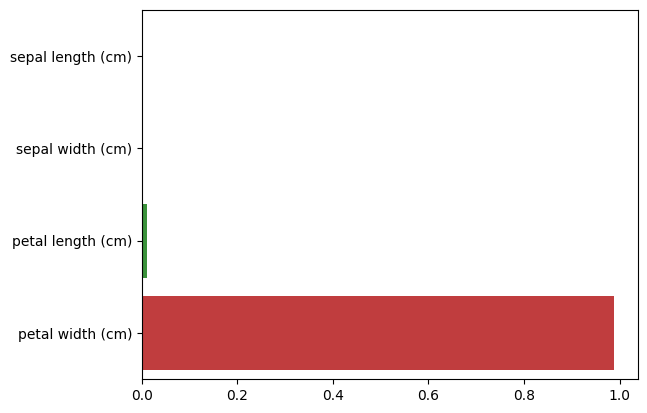

In [ ]:
sns.barplot(x=dtc.feature_importances_,
            y=iris_data.feature_names)
plt.show()

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_features, y_labels = make_classification(n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_classes=3,
                    n_clusters_per_class=1)
x_features.shape,y_labels.shape

((100, 2), (100,))

In [ ]:
df = pd.DataFrame(x_features)
df.describe()

,0,1
count,100.000000,100.000000
mean,0.258078,0.378409
std,1.509016,1.225138
min,-3.082178,-4.412128
25%,-0.780494,-0.115499
50%,0.139419,0.601075
75%,1.395140,1.167957
max,3.806871,2.460919


In [ ]:
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    model.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                                np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


<ipython-input-56-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


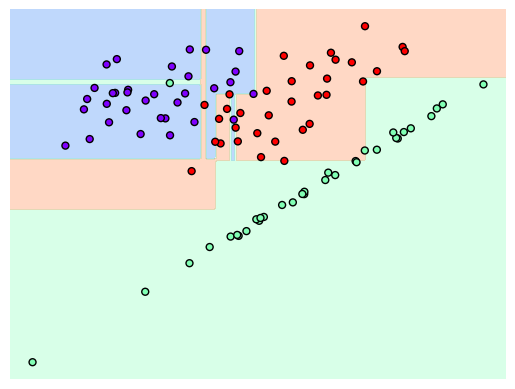

In [ ]:
dfc = DecisionTreeClassifier()
dtc.fit(x_features,y_labels)
visualize_boundary(dfc,x_features,y_labels)